<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/Proyecto%20Final%20ML/%20Entrega%2004%20-%20Model/%20Entrega_04_Model_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###OBTAIN


In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



El conjunto de datos contiene 150 registros bajo cinco atributos: longitud del sépalo 'Sepal Length', ancho del sépalo 'Sepal Width', largo del pétalo 'Petal Length', ancho del pétalo 'Petal Width' y especie 'Species'.

El conjunto de datos contiene 3 especies de 50 instancias cada una, donde cada clase se refiere a un tipo de planta de iris. 

URL (https://archive.ics.uci.edu/ml/datasets/iris)

In [114]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(url, names=['Sepal Length','Sepal Width','Petal Length','Petal Width','Species'])
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [115]:
#comprobando si hay alguna inconsistencia en el conjunto de datos
iris.info()
#como vemos, no hay valores nulos en el conjunto de datos, por lo que los datos se pueden procesar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [116]:
#Comprobando las dimensiones
iris.shape     

(150, 5)

In [120]:
#Checkig the unique values in species column which is our target variable..
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

###SCRUB

Verificar la distribución de los datos de acuerdo a las especies de Iris, utilizando la columna Species y el tamaño de la misma.

In [123]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [124]:
#comprobar si un conjunto de datos contiene un valor faltante o no 
iris.isnull().sum()

#print('Tenemos {} valores NaN/Null'.format(iris.isnull().values.sum()))

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

###EXPLORE

La gráfica a construir será del tipo dispersión, y vamos a graficar primero los datos correspondientes al sépalo. Colocamos en el eje X los datos de longitud y en el eje Y los datos del ancho, a su vez para cada una de las especies de Iris le colocamos un color. Para los datos del Iris setosa los colocamos de color azul, para el Iris Versicolor será de color verde y para el Iris Virginica colocamos los datos de color rojo.

De igual forma colocamos los nombres correspondientes al eje X y Y y el título de la gráfica y procedemos a graficarlos.

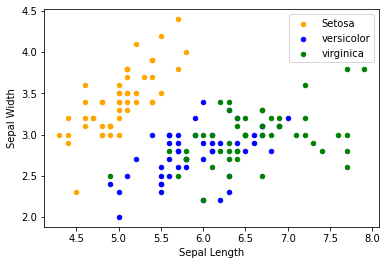

In [138]:
#Longitud del sépalo VS Ancho. Este gráfico muestra la relación entre la longitud del sépalo y el ancho del sépalo.

fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='Sepal Length',y='Sepal Width',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='Sepal Length',y='Sepal Width',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='Sepal Length',y='Sepal Width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
plt.show()

Si te fijas en la gráfica los datos están distribuidos de manera casi uniforme sobretodo los correspondientes al Iris setosa, mientras que los correspondientes a versicolor y virginica tienen cualidades algo parecidas por lo que se solapan en ocasiones.

Ahora procedemos a hacer exactamente lo mismo, pero con la información de los pétalos. Si te fijas el código de programación es exactamente el mismo al anterior lo único diferente es que ahora se especifica los datos del pétalo.

Visualización 2: Longitud del sépalo VS Ancho
- Este gráfico muestra la relación entre la longitud y el ancho de los pétalos.

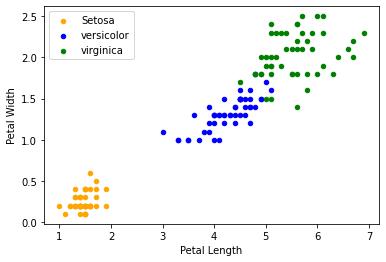

In [137]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='Petal Length',y='Petal Width',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='Petal Length',y='Petal Width',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='Petal Length',y='Petal Width',color='green', label='virginica',ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
plt.show()

Acá podemos observar una distribución mucho más uniforme en comparación con el sépalo.

Hasta este momento hemos importado los datos, los hemos analizados e inclusive los hemos graficado, por lo que ha llegado el momento de desarrollar el clasificador utilizando los algoritmos de Machine Learning.

Como podemos ver, las características de los pétalos ofrecen una mejor división de grupos en comparación con las características de los sépalos. Esta es una indicación de que los Pétalos pueden ayudar en Predicciones mejores y precisas sobre el Sépalo. Lo comprobaremos más tarde.

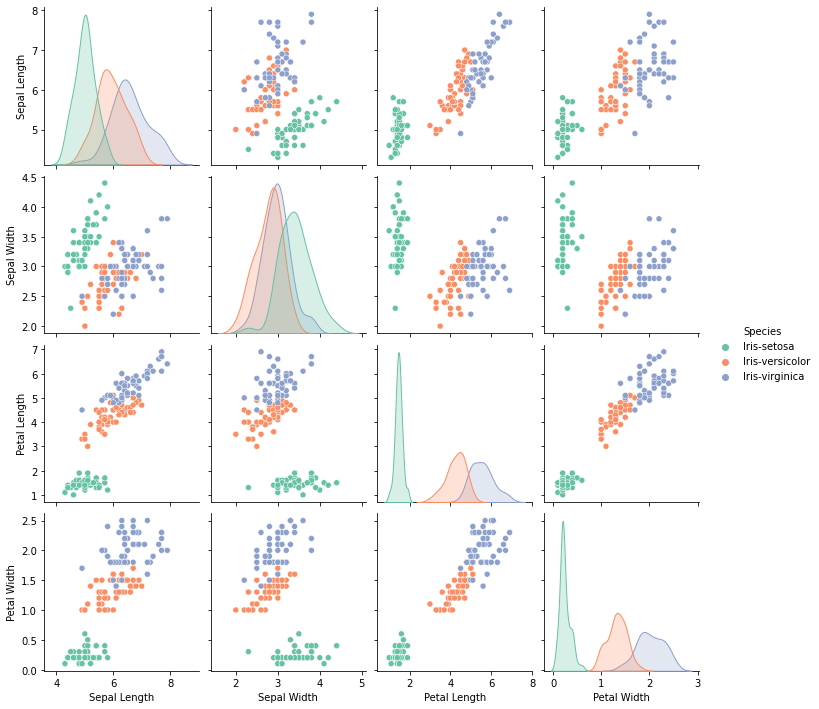

In [127]:
#Visualizar las similitudes y diferencias entre las especies
sns.pairplot(data=iris, hue='Species', palette='Set2')

###MODEL

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import classification_report, confusion_matrix, precision_score #Clasificación y matriz de confusión
from sklearn.model_selection import train_test_split #dividir en conjunto de entrenamiento y prueba.
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import xgboost as xgb

####**SVM** 

Procedemos a desarrollar un nuevo modelo ahora con el algoritmo de Máquinas de Vectores de Soporte, el procedimiento es exactamente igual, primero definimos el algoritmo, en este caso será SVC, lo entrenamos utilizando los datos de entrenamiento, realizamos una predicción y finalmente calculamos la precisión del mismo.
El resultado es de 0,991, un valor mucho mejor que el que obtuvimos con el anterior algoritmo.

In [148]:
#Separando la matriz en dos partes

#La submatriz 'x_svm' contiene los valores de las primeras 4 columnas del conjunto de datos y todas las filas
x_svm=iris.iloc[:,0:4]
x_svm

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [149]:
#El vector contiene los valores de la columna 4 'Species' con todas las filas
y_svm=iris.iloc[:,4]
y_svm

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [174]:
#dividir en conjunto de entrenamiento y prueba.
#70% datos de entrenamiento 30% datos de test
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(x_svm, y_svm, test_size=0.30)

In [175]:
print("Tamaño de los datos de train: ", len(x_train_svm))
print("Tamaño de los datos de test: ", len(x_test_svm))

Tamaño de los datos de train:  105
Tamaño de los datos de test:  45


In [176]:
print(x_train_svm.shape)
print(y_train_svm.shape)
print(x_test_svm.shape)
print(y_test_svm.shape)

(105, 4)
(105,)
(45, 4)
(45,)


Training and Fitting the model

In [177]:
model=SVC()
model.fit(x_train_svm, y_train_svm)

SVC()

Predictions from the trained model

In [178]:
pred_svm = model.predict(x_test_svm)

Model Evaluation

In [179]:
print(confusion_matrix(y_test_svm, pred_svm))

[[18  0  0]
 [ 0 10  0]
 [ 0  4 13]]


In [180]:
print(classification_report(y_test_svm, pred_svm))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       0.71      1.00      0.83        10
 Iris-virginica       1.00      0.76      0.87        17

       accuracy                           0.91        45
      macro avg       0.90      0.92      0.90        45
   weighted avg       0.94      0.91      0.91        45



In [181]:
acc_svm = metrics.accuracy_score(pred_svm, y_test_svm)
print('The accuracy of the SVM is:', acc_svm)

The accuracy of the SVM is: 0.9111111111111111


###Random Forest


Random Forest es un algoritmo de aprendizaje automático flexible y fácil de usar que produce, incluso sin ajuste de hiperparámetros, un gran resultado la mayor parte del tiempo. También es uno de los algoritmos más utilizados, por su sencillez y por el hecho de que se puede utilizar tanto para tareas de clasificación como de regresión.

In [200]:
#Separando la matriz en dos partes

#La submatriz 'X_rf' contiene los valores de las primeras 4 columnas del conjunto de datos y todas las filas
X_rf = iris.iloc[:, 0:4]
X_rf

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [201]:
#El vector contiene los valores de la columna 4 'Species' con todas las filas
y_rf = iris.iloc[:, 4]
y_rf

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [202]:
#dividir en conjunto de entrenamiento y prueba.
#70% datos de entrenamiento 30% datos de test

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf ,test_size = 0.3)

In [203]:
print("Size of training data: ", len(X_train_rf))
print("Size of test data: ", len(X_test_rf))

Size of training data:  105
Size of test data:  45


In [204]:
print(X_train_rf.shape)
print(y_train_rf.shape)
print(X_test_rf.shape)
print(y_test_rf.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [205]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_rf, y_train_rf)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [206]:
#Predicción de los resultados del conjunto de pruebas
y_pred_rf = classifier.predict(X_test_rf)

In [207]:
#Hacer la matriz de confusión
cm_rf = confusion_matrix(y_test_rf, y_pred_rf)
cm_rf

array([[11,  0,  0],
       [ 0, 17,  3],
       [ 0,  0, 14]])

In [208]:
print('The accuracy of the Random forest is:',metrics.accuracy_score(y_pred_rf, y_test_rf))

The accuracy of the Random forest is: 0.9333333333333333


###XG Boost

In [225]:
from sklearn import datasets

iris = datasets.load_iris()
X_boost = iris.data
y_boost = iris.target

In [226]:
X_boost

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [227]:
y_boost

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [229]:
#Dividir las matrices en 70% training, 30% testing
X_train_boost, X_test_boost, y_train_boost, y_test_boost = train_test_split(X_boost, y_boost, test_size=0.3, random_state=42)

In [230]:
print("Train data length:",len(X_train_boost));
print("Test data length:",len(X_test_boost));

Train data length: 105
Test data length: 45


In [231]:
#Creating the Xgboost DMatrix data format (from the arrays already obtained)

import xgboost as xgb

d_boosttrain = xgb.DMatrix(X_train_boost, label=y_train_boost)
d_boosttest = xgb.DMatrix(X_test_boost, label=y_test_boost)

In [232]:
# Setting some parameters

parameters = {
    'eta': 0.3,  
    'silent': True,  # option for logging
    'objective': 'multi:softprob',  # error evaluation for multiclass tasks
    'num_class': 3,  # number of classes to predic
    'max_depth': 3  # depth of the trees in the boosting process
    }  
num_round = 20  # the number of training iterations

In [233]:
#training the model
bst = xgb.train(parameters, d_boosttrain, num_round)

In [234]:
#resut
preds = bst.predict(d_boosttest)

In [235]:
preds[:5]

array([[0.00650657, 0.96226174, 0.03123166],
       [0.970643  , 0.02533227, 0.00402478],
       [0.0033913 , 0.00692109, 0.9896876 ],
       [0.00654362, 0.9677424 , 0.02571394],
       [0.00615641, 0.9104776 , 0.08336602]], dtype=float32)

In [236]:
'''
Selecting the column that represents the highest probability 
(note that, for each line, there is 3 columns, indicating the probability for each class)
'''

import numpy as np

best_preds = np.asarray([np.argmax(line) for line in preds])

In [237]:
best_preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [244]:
#Hacer la matriz de confusión
m = confusion_matrix(y_test_boost, best_preds)
m

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [243]:
#calculating the precision

from sklearn.metrics import precision_score

print(precision_score(y_test_boost, best_preds, average='macro'))

1.0
